<a href="https://colab.research.google.com/github/wlcosta/es235_pdi/blob/master/26_marcadores/Lab_Marcadores.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Geração de Marcadores ArUco

Como vimos na aula, os marcadores em geral podem ser usados para diversas aplicações, como calibração de câmera, estimação de tamanho de objetos, distância da câmera pro objeto, orientação, robótica, navegação autônoma...

O uso dos marcadores ArUco possuem uma vantagem: eles estão disponíveis no OpenCV através do submódulo `cv2.aruco`.

Nesta primeira parte, vamos entender como criar marcadores para utilizá-los em nossos projetos.

In [12]:
!pip install opencv-contrib-python
import numpy as np
import cv2
from google.colab.patches import cv2_imshow

O OpenCV suporta vários tipos de marcadores ArUco. Vamos colocá-los em um dicionário para serem mais facilmente lidos.

In [5]:
marcadores = {
  "MARCADOR_4X4_50": cv2.aruco.DICT_4X4_50,
	"MARCADOR_4X4_100": cv2.aruco.DICT_4X4_100,
	"MARCADOR_4X4_250": cv2.aruco.DICT_4X4_250,
	"MARCADOR_4X4_1000": cv2.aruco.DICT_4X4_1000,
	"MARCADOR_5X5_50": cv2.aruco.DICT_5X5_50,
	"MARCADOR_5X5_100": cv2.aruco.DICT_5X5_100,
	"MARCADOR_5X5_250": cv2.aruco.DICT_5X5_250,
	"MARCADOR_5X5_1000": cv2.aruco.DICT_5X5_1000,
	"MARCADOR_6X6_50": cv2.aruco.DICT_6X6_50,
	"MARCADOR_6X6_100": cv2.aruco.DICT_6X6_100,
	"MARCADOR_6X6_250": cv2.aruco.DICT_6X6_250,
	"MARCADOR_6X6_1000": cv2.aruco.DICT_6X6_1000,
	"MARCADOR_7X7_50": cv2.aruco.DICT_7X7_50,
	"MARCADOR_7X7_100": cv2.aruco.DICT_7X7_100,
	"MARCADOR_7X7_250": cv2.aruco.DICT_7X7_250,
	"MARCADOR_7X7_1000": cv2.aruco.DICT_7X7_1000,
	"MARCADOR_ARUCO_ORIGINAL": cv2.aruco.DICT_ARUCO_ORIGINAL
}

A maioria desses marcadores seguem uma convenção em relação ao nome, algo como `cv2.aruco.DICT_NxN_M`. Mas, o que esses valores significam?

- O valor `NxN` se refere ao tamanho do marcador em bits. Para um marcador `5x5`, temos um total de `25 bits` de dados.
- O valor `M` fala do número total de marcadores únicos que podem ser gerados com aquele dicionário.

Logo, a configuração `cv2.aruco.DICT_5X5_250` irá gerar até 250 marcadores 5x5 únicos.

Como escolher uma configuração?

1. **Quantos valores únicos você precisa?** Pensando em um processo escalável, use a quantidade mínima necessária para a sua necessidade.
2. **Como será o reconhecimento?** Para vídeos de alta resolução, o marcado precisará ser maior para ser reconhecido.

Vamos carregar agora o nosso dicionário.

In [8]:
tipo = "MARCADOR_4X4_50"
dicionarioAruco = cv2.aruco.Dictionary_get(marcadores[tipo])

Com o nosso dicionário carregado, vamos gerar agora um marcador. Para isso, complete o código abaixo:

Na linha 2, altere a chaamda do método drawMarker de acordo com as informações abaixo.

O método `cv2.aruco.drawMarker` recebe como argumento:
1. O dicionário ArUco que foi carregado previamente usando o método `cv2.aruco.Dictionary_get`.
2. O ID da tag que estamos desenhando. Para funcionar com o formulário ao lado, use a variável `tagID`.
3. O tamanho da tag que será desenhada. Deve ser igual ao tamanho especificado na linha 3. *Bônus: que tal pegar esse valor de forma dinâmica usando o atributo shape?*
4. A variável que irá receber a tag. No caso, use `tag`.
5. A borda que será acrescentada na imagem. Tipicamente, usamos `1`.

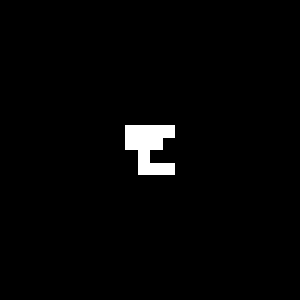

In [41]:
tagID = 24 #@param {type:"slider", min:0, max:50, step:1}
tag = np.zeros((300, 300, 1), dtype="uint8")
cv2.aruco.drawMarker(dicionarioAruco, tagID, 300, tag, 10)
cv2_imshow(tag)

# Detecção de Marcadores

Agora que já geramos nosso conjunto de marcadores, vamos aprender a reconhecê-los em uma imagem.

Na célula abaixo, vamos carregar uma imagem de teste e usá-la como exemplo. Complete o código abaixo da seguinte forma:

Na linha 5, use o método `cv2.aruco.detectMarkers()` que recebe como argumento:
1. A imagem de entrada;
2. A configuração, que no nosso caso, é o `dicionarioAruco` criado previamente.
3. Os parâmetros que foram criados na linha 4.

Logo a seguir, complete o código das linhas 8 e 9 usando o método `cv2.aruco.drawDetectedMarkers()` com os seguintes argumentos:
1. A imagem de entrada.
2. O que queremos desenhar. No caso, use `cantos` em uma linha e `rejeitados` em outra.
3. As referências. Use `ids` para a linha de `cantos` e `borderColor=(100, 0, 240)` para a linha dos `rejeitados`.

In [42]:
!wget https://raw.githubusercontent.com/wlcosta/es235_pdi/master/utils/test.png

--2021-07-21 23:48:32--  https://raw.githubusercontent.com/wlcosta/es235_pdi/master/utils/test.png
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 201025 (196K) [image/png]
Saving to: ‘test.png.1’

test.png.1          100%[===================>] 196.31K  --.-KB/s    in 0.03s   

2021-07-21 23:48:32 (7.55 MB/s) - ‘test.png.1’ saved [201025/201025]



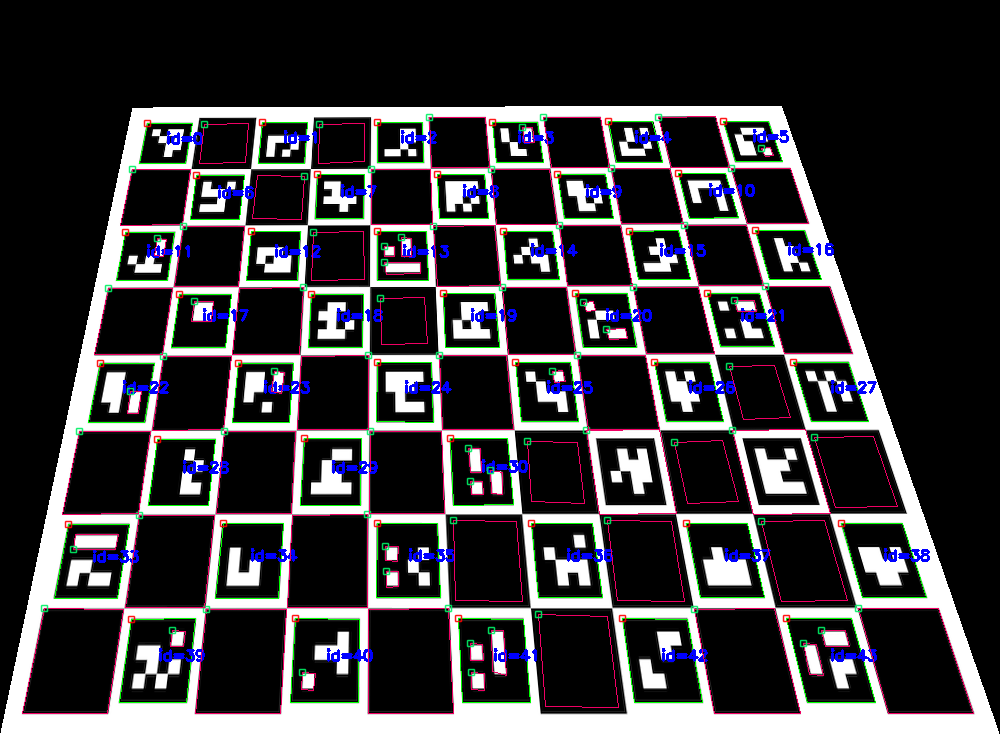

In [32]:
image = cv2.imread("test.png")

parametros = cv2.aruco.DetectorParameters_create()
cantos, ids, rejeitados = cv2.aruco.detectMarkers(None)
cv2.aruco.drawDetectedMarkers(None)
cv2.aruco.drawDetectedMarkers(None)

cv2_imshow(image)